# Problem 1: Diabetic Retinopathy Detection using Color Fundus Photos
1. Problem descriptio: 
Detect diabetic retinopathy disease from the two-dimensional color fundus images
2. Data: et
ODIR-5K
3. Evaluation m: tric
Overall AUC, and AUCs in Female and Male groups, respectively
4. Benchmark : ethods
Choose at least 2 models from: VGG, ResNet, DenseNet, EfficientNet, Vision Transformer (ViT)

# Exploratory Data Analysis (EDA)

In [1197]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [1199]:
folder = 'D:\\Problem_1_Diabetic_Retinopathy_Detection_using_Color_Fundus_Photos\\ODIR_Data'

In [1201]:
sample_data = np.load(os.path.join(folder, 'train', '1_left.npz'))

In [1203]:
list(sample_data.keys())

['slo_fundus',
 'race',
 'male',
 'hispanic',
 'maritalstatus',
 'language',
 'dr_class',
 'dr_subtype']

In [1205]:
type(sample_data['slo_fundus'])

numpy.ndarray

In [1207]:
type(sample_data['race'])

numpy.ndarray

In [1209]:
sample_data['race'], sample_data['male'], sample_data['hispanic'], sample_data['maritalstatus'], sample_data['language']

(array(0, dtype=int64),
 array(1, dtype=int64),
 array(1, dtype=int64),
 array(0, dtype=int64),
 array(2, dtype=int64))

In [1211]:
sample_data['dr_class'], sample_data['dr_subtype']

(array(0, dtype=int64), array('no.dr.diagnosis', dtype='<U15'))

In [1213]:
#sample_data['slo_fundus']

In [1217]:
def plot_2dmap(data, title=''):
    plt.imshow(data, cmap='viridis', aspect='auto')
    plt.colorbar(label='Thickness')
    plt.title(title)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.
    plt.show()

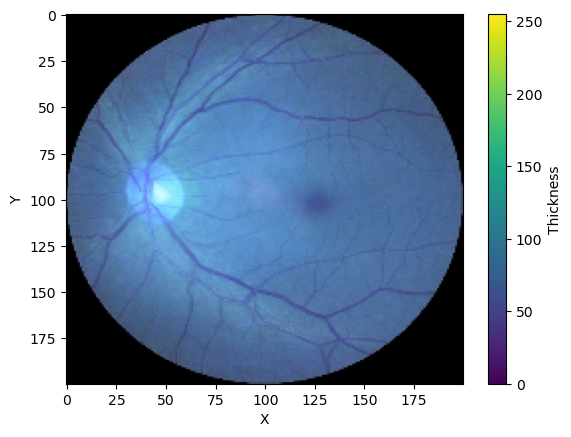

In [1219]:
plot_2dmap(sample_data['slo_fundus'])

In [1229]:
sample_data1 = np.load(os.path.join(folder, 'train', '1_left.npz'))
sample_data2 = np.load(os.path.join(folder, 'train', '491_right.npz'))
sample_data3 = np.load(os.path.join(folder, 'train', '2523_right.npz'))
sample_data4 = np.load(os.path.join(folder, 'train', '3004_left.npz'))

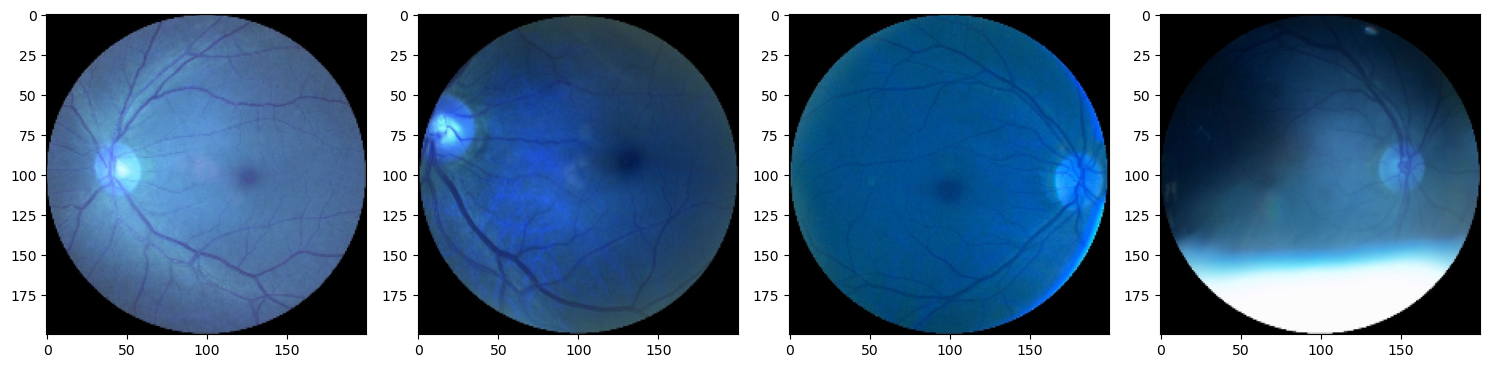

In [1249]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

plt.figure(figsize=(15, 4))

plt.subplot(1, 4, 1)
plt.imshow(sample_data['slo_fundus'])

plt.subplot(1, 4, 2)
plt.imshow(sample_data4['slo_fundus'])

plt.subplot(1, 4, 3)
plt.imshow(sample_data3['slo_fundus'])

plt.subplot(1, 4, 4)
plt.imshow(sample_data2['slo_fundus'])

# Show the plot
plt.tight_layout()
plt.savefig("data.png")
plt.show()

In [393]:
sample_data['slo_fundus'].shape

(200, 200, 3)

In [232]:
folder = 'D:\\Problem_1_Diabetic_Retinopathy_Detection_using_Color_Fundus_Photos\\ODIR5K\\'

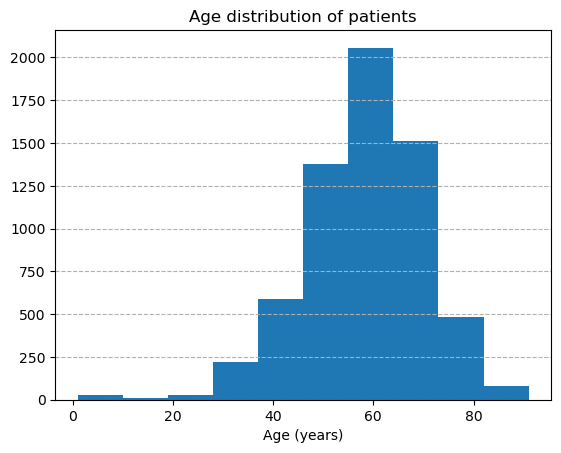

In [276]:
plt.hist(meta['Patient Age'], bins=10)
plt.title("Age distribution of patients")
plt.xlabel("Age (years)")
plt.grid(axis='y', linestyle='--')
plt.ylabel("")
plt.show()

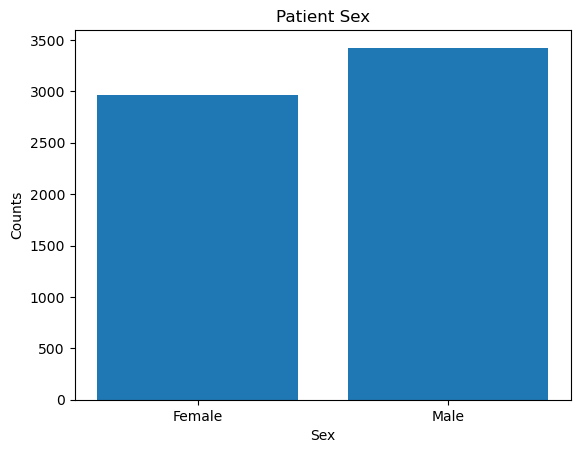

In [290]:
from collections import Counter

sex = Counter(meta['Patient Sex']).keys()
scounts = Counter(meta['Patient Sex']).values()

plt.bar(sex, counts)
plt.title("Patient Sex")
plt.xlabel("Sex")
plt.ylabel("Count")
plt.show()

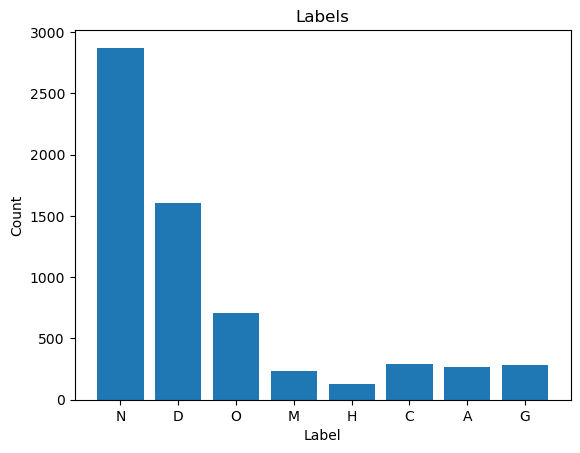

In [294]:
label = Counter(meta['labels']).keys()
lcounts = Counter(meta['labels']).values()

plt.bar(label, lcounts)
plt.title("Labels")
plt.xlabel("Label")
plt.ylabel("Count")
plt.show()

## Data preprocessing

In [306]:
def has_key(term, text):
    if term in text:
        return 1
    else:
        return 0

In [336]:
from tensorflow.keras.preprocessing.image import load_img,img_to_array
from tqdm import tqdm
import cv2
import random

flist = os.path.join(folder, 'preprocessed_images')
image_size=224
labels = []
data = []

In [346]:
# Data labeling and resizing to fit in VGG16 model
def data_labeling(imagecategory, label):
    for img in tqdm(imagecategory):
        imgpath = os.path.join(flist, img);
        try:
            image = cv2.imread(imgpath, cv2.IMREAD_COLOR)
            image = cv2.resize(image,(image_size, image_size))
        except:
            continue;
        data.append([np.array(image),np.array(label)]);
    random.shuffle(data);
    return data

In [348]:
dataset = data_labeling(normal, 0)
dataset = data_labeling(cataract, 1)
dataset = data_labeling(diab, 2)
dataset = data_labeling(glaucoma, 3)
dataset = data_labeling(hyper, 4)
dataset = data_labeling(myopia, 5)
dataset = data_labeling(age, 6)
dataset = data_labeling(other, 7)

100%|██████████| 324/324 [00:02<00:00, 124.99it/s]


6796

In [350]:
len(dataset)

6796

In [352]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

train_x = np.array([i[0] for i in dataset]).reshape(-1, image_size, image_size, 3);
train_y = np.array([i[1] for i in dataset])

x_train, x_temp, y_train, y_temp = train_test_split(train_x, train_y, test_size=0.2, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)

y_train_cat = to_categorical(y_train, num_classes=8)
y_val_cat = to_categorical(y_val, num_classes=8)
y_test_cat = to_categorical(y_test, num_classes=8)

### Data loader

In [354]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
idg = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    vertical_flip=False,
    fill_mode='nearest'
)
idg_test = ImageDataGenerator(rescale=1./255)

In [356]:
idg.fit(x_train)
idg.fit(x_val)
idg_test.fit(x_test)

In [387]:
train = (x_train, y_train_cat)
validation = (x_val, y_val_cat)
test = (x_test, y_test_cat)

In [801]:
#x_test

In [727]:
y_test_cat

array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

# Model building
## VGG 16

In [371]:
import tensorflow as tf
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout

In [373]:
# Load pretrained
input_shape = (224, 224, 3)
vgg16 = VGG16(weights='imagenet', include_top=False, input_shape=input_shape)

In [375]:
vgg16.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [377]:
for layer in vgg16.layers:
    layer.trainable = False

In [379]:
flat = tf.keras.layers.Flatten() (vgg16.output)
dense1 = tf.keras.layers.Dense(256, activation="relu") (flat)
dropout1 = Dropout(0.5)(dense1)
dense2 = tf.keras.layers.Dense(128, activation="relu") (dropout1)
dropout2 = Dropout(0.5)(dense2)
output = Dense(8, activation="softmax")(dropout2)

In [381]:
final_vgg16 = tf.keras.models.Model(inputs=[vgg16.input], outputs=[output])
final_vgg16.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │     6,422,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 8)              │         1,03

 Total params: 21,171,400 (80.76 MB)

 Trainable params: 6,456,712 (24.63 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [383]:
from tensorflow.keras.optimizers import Adam
final_vgg16.compile(optimizer=Adam(learning_rate=1e-4),
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])

In [391]:
history = final_vgg16.fit(train[0], train[1], validation_data=(validation[0], validation[1]), batch_size=32, epochs=30)

Epoch 1/30


C:\Users\DDNest002\anaconda3\Lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['keras_tensor_40']. Received: the structure of inputs=*
  warnings.warn(


170/170 ━━━━━━━━━━━━━━━━━━━━ 470s 3s/step - accuracy: 0.2132 - loss: 6.2307 - val_accuracy: 0.4074 - val_loss: 1.7889
Epoch 2/30
170/170 ━━━━━━━━━━━━━━━━━━━━ 462s 3s/step - accuracy: 0.3212 - loss: 1.9270 - val_accuracy: 0.4412 - val_loss: 1.6278
Epoch 3/30
170/170 ━━━━━━━━━━━━━━━━━━━━ 455s 3s/step - accuracy: 0.3563 - loss: 1.8388 - val_accuracy: 0.4500 - val_loss: 1.5903
Epoch 4/30
170/170 ━━━━━━━━━━━━━━━━━━━━ 455s 3s/step - accuracy: 0.4163 - loss: 1.7363 - val_accuracy: 0.4574 - val_loss: 1.5363
Epoch 5/30
170/170 ━━━━━━━━━━━━━━━━━━━━ 454s 3s/step - accuracy: 0.4173 - loss: 1.6628 - val_accuracy: 0.4912 - val_loss: 1.4283
Epoch 6/30
170/170 ━━━━━━━━━━━━━━━━━━━━ 452s 3s/step - accuracy: 0.4525 - loss: 1.5820 - val_accuracy: 0.5074 - val_loss: 1.3889
Epoch 7/30
170/170 ━━━━━━━━━━━━━━━━━━━━ 454s 3s/step - accuracy: 0.4556 - loss: 1.5323 - val_accuracy: 0.5059 - val_loss: 1.3691
Epoch 8/30
170/170 ━━━━━━━━━━━━━━━━━━━━ 454s 3s/step - accuracy: 0.4750 - loss: 1.4557 - val_accuracy: 0.573

In [431]:
train_loss, train_accuracy = final_vgg16.evaluate(train[0], train[1], verbose=0)
print(f"Training accuracy: {train_accuracy*100:.2f}%")
print("Training loss: ", train_loss)

Training accuracy: 75.17%
Training loss:  0.6045523881912231


In [430]:
val_loss, val_accuracy = final_vgg16.evaluate(validation[0], validation[1], verbose=0)
print(f"Validation accuracy: {val_accuracy*100:.2f}%")
print("Validation loss: ", val_loss)

Validation accuracy: 70.15%
Validation loss:  0.9183493852615356


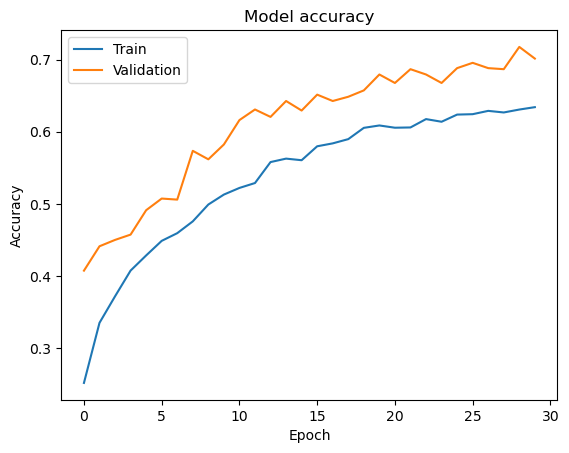

In [434]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

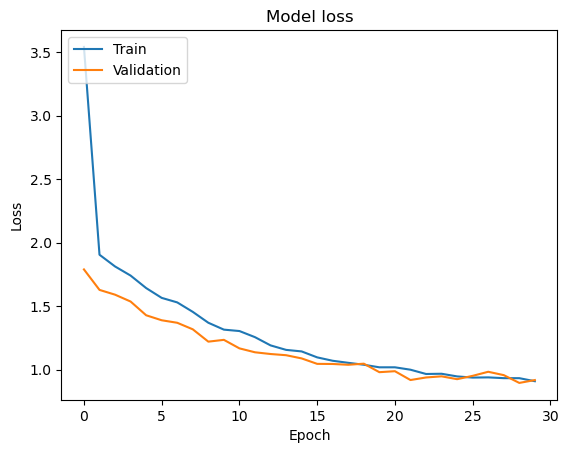

In [436]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [438]:
test_loss, test_accuracy = final_vgg16.evaluate(test[0], test[1], verbose=0)
print(f"Test accuracy: {test_accuracy * 100:.2f}%")
print("Test loss: ", test_loss)

Test accuracy: 67.21%
Test loss:  0.9120261669158936


In [440]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

y_pred = []
for i in final_vgg16.predict(x_test):
    y_pred.append(np.argmax(np.array(i)).astype("int32"))

# print(y_pred)

C:\Users\DDNest002\anaconda3\Lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['keras_tensor_40']. Received: the structure of inputs=*
  warnings.warn(


22/22 ━━━━━━━━━━━━━━━━━━━━ 51s 2s/step


In [444]:
# Model save
final_vgg16.save("ODIR_VGG16.h5")

## VGG19

In [453]:
import tensorflow as tf
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten,Dense,Dropout

In [455]:
image_size = 224
vgg19 = VGG19(weights="imagenet",include_top = False,input_shape=(image_size,image_size,3))

80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [457]:
vgg19.summary()

Model: "vgg19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv4 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv4 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv4 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,024,384 (76.39 MB)

 Trainable params: 20,024,384 (76.39 MB)

 Non-trainable params: 0 (0.00 B)

In [459]:
for layer in vgg19.layers:
    layer.trainable = False

In [461]:
flat = tf.keras.layers.Flatten() (vgg19.output)
dense1 = tf.keras.layers.Dense(256, activation="relu") (flat)
dense2 = tf.keras.layers.Dense(256, activation="relu") (dense1)
output = tf.keras.layers.Dense(8, activation="softmax") (dense2)
final_vgg19 = tf.keras.models.Model(inputs=[vgg19.input], outputs=[output])


In [463]:
final_vgg19.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv4 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv4 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv4 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │     6,422,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 256)            │        65,79

 Total params: 26,515,016 (101.15 MB)

 Trainable params: 6,490,632 (24.76 MB)

 Non-trainable params: 20,024,384 (76.39 MB)

In [465]:
final_vgg19.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [471]:
from sklearn.utils.class_weight import compute_class_weight
class_counts = np.bincount(y_train)
total_samples = np.sum(class_counts)
class_weights = total_samples / (len(class_counts) * class_counts)
class_weight = dict(enumerate(class_weights))

In [473]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping_callback = EarlyStopping(
    monitor='val_accuracy',
    patience=40,
    verbose = 1,
    restore_best_weights=True,
    mode = 'max'
)

In [475]:
history = final_vgg19.fit(train[0], train[1], 
                          validation_data=(validation[0], validation[1]), 
                          batch_size=32, 
                          epochs=30, 
                          class_weight=class_weight, 
                          callbacks=[early_stopping_callback])

Epoch 1/30


C:\Users\DDNest002\anaconda3\Lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['keras_tensor_65']. Received: the structure of inputs=*
  warnings.warn(


170/170 ━━━━━━━━━━━━━━━━━━━━ 637s 4s/step - accuracy: 0.2814 - loss: 13.2337 - val_accuracy: 0.4206 - val_loss: 1.8250
Epoch 2/30
170/170 ━━━━━━━━━━━━━━━━━━━━ 637s 4s/step - accuracy: 0.6049 - loss: 0.8921 - val_accuracy: 0.5676 - val_loss: 1.3798
Epoch 3/30
170/170 ━━━━━━━━━━━━━━━━━━━━ 641s 4s/step - accuracy: 0.7401 - loss: 0.5777 - val_accuracy: 0.6500 - val_loss: 1.2000
Epoch 4/30
170/170 ━━━━━━━━━━━━━━━━━━━━ 637s 4s/step - accuracy: 0.8051 - loss: 0.4773 - val_accuracy: 0.5132 - val_loss: 1.8188
Epoch 5/30
170/170 ━━━━━━━━━━━━━━━━━━━━ 652s 4s/step - accuracy: 0.7806 - loss: 0.5665 - val_accuracy: 0.6103 - val_loss: 1.7222
Epoch 6/30
170/170 ━━━━━━━━━━━━━━━━━━━━ 633s 4s/step - accuracy: 0.8125 - loss: 0.4726 - val_accuracy: 0.7897 - val_loss: 0.9175
Epoch 7/30
170/170 ━━━━━━━━━━━━━━━━━━━━ 615s 4s/step - accuracy: 0.8587 - loss: 0.3708 - val_accuracy: 0.7324 - val_loss: 0.9861
Epoch 8/30
170/170 ━━━━━━━━━━━━━━━━━━━━ 611s 4s/step - accuracy: 0.8814 - loss: 0.3087 - val_accuracy: 0.74

In [498]:
train_loss, train_accuracy = final_vgg19.evaluate(train[0], train[1], verbose=0)
print(f"Training accuracy: {train_accuracy*100:.2f}%")
print("Training loss: ", train_loss)

Training accuracy: 96.63%
Training loss:  0.12054416537284851


In [500]:
val_loss, val_accuracy = final_vgg19.evaluate(validation[0], validation[1], verbose=0)
print(f"Validation accuracy: {val_accuracy*100:.2f}%")
print("Validation loss: ", val_loss)

Validation accuracy: 86.32%
Validation loss:  0.8712055683135986


In [501]:
test_loss, test_accuracy = final_vgg19.evaluate(test[0], test[1], verbose=0)
print(f"Test accuracy: {test_accuracy*100:.2f}%")
print("Test loss: ", test_loss)

Test accuracy: 89.12%
Test loss:  0.7108551263809204


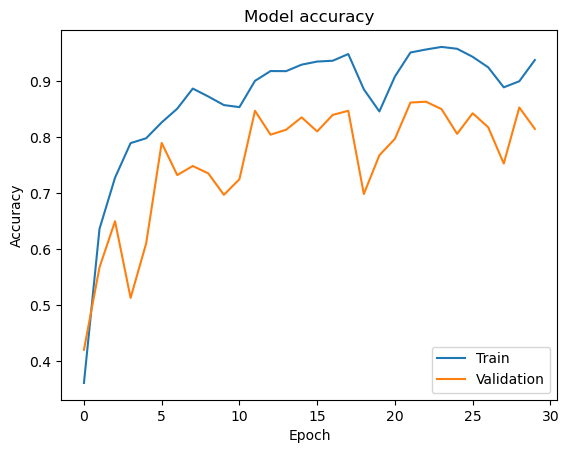

In [510]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

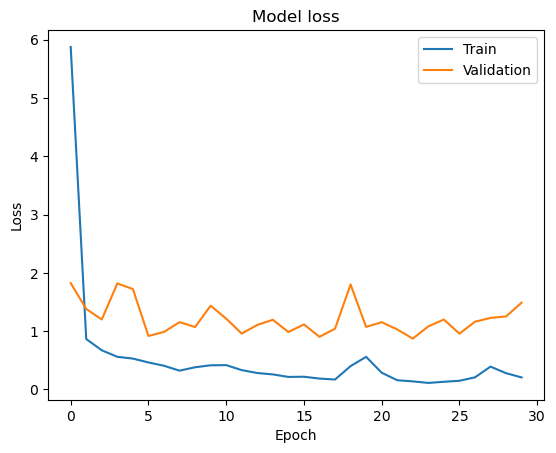

In [512]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [514]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

y_pred = []
for i in final_vgg19.predict(x_test):
    y_pred.append(np.argmax(np.array(i)).astype("int32"))

# print(y_pred)

C:\Users\DDNest002\anaconda3\Lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['keras_tensor_65']. Received: the structure of inputs=*
  warnings.warn(


22/22 ━━━━━━━━━━━━━━━━━━━━ 68s 3s/step


In [518]:
# Model save
final_vgg19.save("ODIR_VGG19.h5")

## ResNet50

In [520]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras import layers, models

from tensorflow.keras.layers import Dense, Flatten, Dropout

In [522]:
image_size = 224
resnet50 = ResNet50(weights="imagenet", include_top=False, input_shape=(image_size, image_size, 3))

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [524]:
for layer in resnet50.layers:
    layer.trainable = False

In [526]:
resnet50.summary()

Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer_4[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_3_c

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 23,587,712 (89.98 MB)

In [528]:
n_inputs = resnet50.output_shape[1]
n_inputs

7

In [530]:
flat = layers.Flatten()(resnet50.output)
dense1 = layers.Dense(2048, activation="relu")(flat)
dropout1 = layers.Dropout(0.4)(dense1)
dense2 = layers.Dense(2048, activation="relu")(dropout1)
dropout2 = layers.Dropout(0.4)(dense2)
output = layers.Dense(8, activation="softmax")(dropout2)

In [532]:
final_resnet50 = tf.keras.models.Model(inputs=[resnet50.input], outputs=[output])

In [534]:
final_resnet50.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer_4[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_3_c

 Total params: 233,323,400 (890.06 MB)

 Trainable params: 209,735,688 (800.08 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [536]:
from tensorflow.keras.optimizers import SGD
final_resnet50.compile(optimizer=SGD(learning_rate=3e-4, momentum=0.9),
              loss="categorical_crossentropy",
              metrics=['accuracy'])

In [538]:
history_resnet50 = final_resnet50.fit(train[0], train[1], validation_data=(validation[0], validation[1]), batch_size=32, epochs=50, class_weight=class_weight)

Epoch 1/50


C:\Users\DDNest002\anaconda3\Lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['keras_tensor_91']. Received: the structure of inputs=*
  warnings.warn(


170/170 ━━━━━━━━━━━━━━━━━━━━ 321s 2s/step - accuracy: 0.2393 - loss: 3.1355 - val_accuracy: 0.3926 - val_loss: 1.4839
Epoch 2/50
170/170 ━━━━━━━━━━━━━━━━━━━━ 296s 2s/step - accuracy: 0.3246 - loss: 1.5043 - val_accuracy: 0.4735 - val_loss: 1.3668
Epoch 3/50
170/170 ━━━━━━━━━━━━━━━━━━━━ 283s 2s/step - accuracy: 0.3687 - loss: 1.3564 - val_accuracy: 0.3750 - val_loss: 1.4673
Epoch 4/50
170/170 ━━━━━━━━━━━━━━━━━━━━ 281s 2s/step - accuracy: 0.3739 - loss: 1.2845 - val_accuracy: 0.4853 - val_loss: 1.3513
Epoch 5/50
170/170 ━━━━━━━━━━━━━━━━━━━━ 280s 2s/step - accuracy: 0.4144 - loss: 1.1777 - val_accuracy: 0.4588 - val_loss: 1.3585
Epoch 6/50
170/170 ━━━━━━━━━━━━━━━━━━━━ 280s 2s/step - accuracy: 0.4349 - loss: 1.1123 - val_accuracy: 0.4456 - val_loss: 1.3384
Epoch 7/50
170/170 ━━━━━━━━━━━━━━━━━━━━ 282s 2s/step - accuracy: 0.4556 - loss: 1.0625 - val_accuracy: 0.5162 - val_loss: 1.2584
Epoch 8/50
170/170 ━━━━━━━━━━━━━━━━━━━━ 279s 2s/step - accuracy: 0.4791 - loss: 1.0082 - val_accuracy: 0.451

In [542]:
train_loss, train_accuracy = final_resnet50.evaluate(train[0], train[1], verbose=0)
print(f"Training Accuracy: {train_accuracy * 100:.2f}%")

Training Accuracy: 95.88%


In [ ]:
plt.plot(history_resnet50.history['accuracy'])
plt.plot(history_resnet50.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [ ]:
plt.plot(history_resnet50.history['loss'])
plt.plot(history_resnet50.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [543]:
val_loss, val_accuracy = final_resnet50.evaluate(validation[0], validation[1], verbose=0)
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")

Validation Accuracy: 86.03%


In [544]:
test_loss, test_accuracy = final_resnet50.evaluate(test[0], test[1], verbose=0)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

Test Accuracy: 86.76%


In [545]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
y_pred = []
for i in final_resnet50.predict(x_test):
    y_pred.append(np.argmax(np.array(i)).astype("int32"))

#print(y_pred)

22/22 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step


In [547]:
final_resnet50.save("ODIR_resnet50.h5")

## DenseNet201

In [555]:
from tensorflow.keras.models import Model
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten,Dense, Conv2D, BatchNormalization, Dropout
from tensorflow.keras.applications import DenseNet201

In [558]:
densenet = DenseNet201(weights="imagenet", input_shape=(224, 224, 3), include_top=False, pooling=max)

74836368/74836368 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [560]:
densenet.summary()

Model: "densenet201"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_5       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ zero_padding2d      │ (None, 230, 230,  │          0 │ input_layer_5[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,408 │ zero_padding2d[0… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ zero_padding2d_1    │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1               │ (None, 56, 56,    │          0 │ zero_padding2d_1… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │        256 │ pool1[0][0]       │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_relu │ (None, 56, 56,    │          0 │ conv2_block1_0_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      8,192 │ conv2_block1_0_r… │
│ (Conv2D)            │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        512 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,864 │ conv2_block1_1_r… │
│ (Conv2D)            │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_concat │ (None, 56, 56,    │          0 │ pool1[0][0],      │
│ (Concatenate)       │ 96)               │            │ conv2_block1_2_c… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_0_bn   │ (None, 56, 56,    │        384 │ conv2_block1_con… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_0_relu │ (None, 56, 56,    │          0 │ conv2_block2_0_b… │
│ (Activation)        │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_1_conv │ (None, 56, 56,    │     12,288 │ conv2_block2_0_r

 Total params: 18,321,984 (69.89 MB)

 Trainable params: 18,092,928 (69.02 MB)

 Non-trainable params: 229,056 (894.75 KB)

In [562]:
for layer in densenet.layers:
    layer.trainable = False

In [564]:
drop1 = Dropout(0.9)(densenet.output)
flat = Flatten() (drop1)
b1 = BatchNormalization(axis=-1)(flat)
dense1 = Dense(512, activation = 'sigmoid')(b1)
b2 = BatchNormalization(axis=-1)(dense1)
dense2 = Dense(512, activation = 'sigmoid')(b2)
b3 = BatchNormalization(axis=-1)(dense2)
dense3 = Dense(512, activation = 'relu')(b3)
drop2 = Dropout(0.9)(dense3)
output = Dense(8, activation = 'sigmoid')(drop2)

In [566]:
final_densenet = tf.keras.models.Model(inputs=[densenet.input], outputs=[output])

In [568]:
final_densenet.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_5       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ zero_padding2d      │ (None, 230, 230,  │          0 │ input_layer_5[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,408 │ zero_padding2d[0… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ zero_padding2d_1    │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1               │ (None, 56, 56,    │          0 │ zero_padding2d_1… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │        256 │ pool1[0][0]       │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_relu │ (None, 56, 56,    │          0 │ conv2_block1_0_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      8,192 │ conv2_block1_0_r… │
│ (Conv2D)            │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        512 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,864 │ conv2_block1_1_r… │
│ (Conv2D)            │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_concat │ (None, 56, 56,    │          0 │ pool1[0][0],      │
│ (Concatenate)       │ 96)               │            │ conv2_block1_2_c… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_0_bn   │ (None, 56, 56,    │        384 │ conv2_block1_con… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_0_relu │ (None, 56, 56,    │          0 │ conv2_block2_0_b… │
│ (Activation)        │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_1_conv │ (None, 56, 56,    │     12,288 │ conv2_block2_0_r

 Total params: 67,401,288 (257.12 MB)

 Trainable params: 48,889,096 (186.50 MB)

 Non-trainable params: 18,512,192 (70.62 MB)

In [570]:
from tensorflow.keras.losses import SparseCategoricalCrossentropy
final_densenet.compile(optimizer="adam",
              loss="categorical_crossentropy",
              metrics=['accuracy'])

In [572]:
history_densenet201 = final_densenet.fit(train[0], train[1], validation_data=(validation[0], validation[1]), batch_size=32, epochs=25, callbacks=[early_stopping_callback])

Epoch 1/25


C:\Users\DDNest002\anaconda3\Lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['keras_tensor_272']. Received: the structure of inputs=*
  warnings.warn(


170/170 ━━━━━━━━━━━━━━━━━━━━ 474s 3s/step - accuracy: 0.2170 - loss: 4.4296 - val_accuracy: 0.3676 - val_loss: 1.6266
Epoch 2/25
170/170 ━━━━━━━━━━━━━━━━━━━━ 437s 3s/step - accuracy: 0.2973 - loss: 2.7182 - val_accuracy: 0.4368 - val_loss: 1.4715
Epoch 3/25
170/170 ━━━━━━━━━━━━━━━━━━━━ 420s 2s/step - accuracy: 0.3266 - loss: 2.1040 - val_accuracy: 0.4471 - val_loss: 1.4885
Epoch 4/25
170/170 ━━━━━━━━━━━━━━━━━━━━ 419s 2s/step - accuracy: 0.3491 - loss: 1.7908 - val_accuracy: 0.4662 - val_loss: 1.4734
Epoch 5/25
170/170 ━━━━━━━━━━━━━━━━━━━━ 421s 2s/step - accuracy: 0.3969 - loss: 1.6626 - val_accuracy: 0.4897 - val_loss: 1.3933
Epoch 6/25
170/170 ━━━━━━━━━━━━━━━━━━━━ 420s 2s/step - accuracy: 0.4245 - loss: 1.5442 - val_accuracy: 0.4662 - val_loss: 1.3798
Epoch 7/25
170/170 ━━━━━━━━━━━━━━━━━━━━ 419s 2s/step - accuracy: 0.4262 - loss: 1.5487 - val_accuracy: 0.5088 - val_loss: 1.3106
Epoch 8/25
170/170 ━━━━━━━━━━━━━━━━━━━━ 421s 2s/step - accuracy: 0.4410 - loss: 1.4554 - val_accuracy: 0.523

In [588]:
history_densenet201

In [595]:
train_loss, train_accuracy = final_densenet.evaluate(train[0], train[1], verbose=0)
print(f"Training Accuracy: {train_accuracy * 100:.2f}%")

Training Accuracy: 39.33%


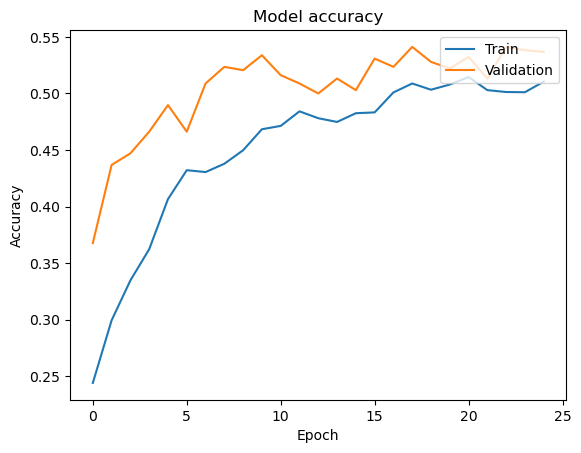

In [596]:
plt.plot(history_densenet201.history['accuracy'])
plt.plot(history_densenet201.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

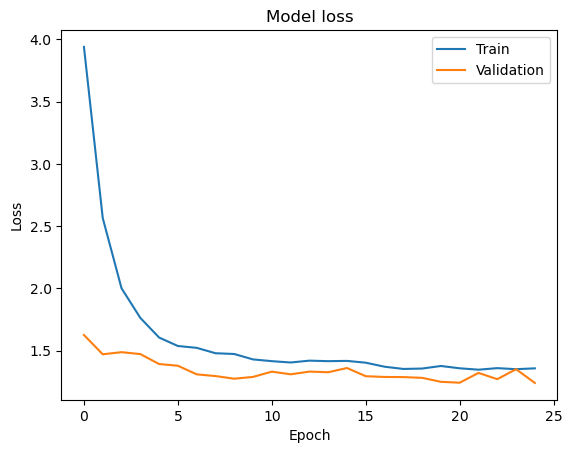

In [597]:
plt.plot(history_densenet201.history['loss'])
plt.plot(history_densenet201.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [598]:
val_loss, val_accuracy = final_densenet.evaluate(validation[0], validation[1], verbose=0)
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")

Validation Accuracy: 36.76%


In [599]:
test_loss, test_accuracy = final_densenet.evaluate(test[0], test[1], verbose=0)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

Test Accuracy: 38.68%


In [600]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
y_pred = []
for i in final_densenet.predict(x_test):
    y_pred.append(np.argmax(np.array(i)).astype("int32"))

#print(y_pred)

C:\Users\DDNest002\anaconda3\Lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['keras_tensor_272']. Received: the structure of inputs=*
  warnings.warn(


22/22 ━━━━━━━━━━━━━━━━━━━━ 55s 2s/step
[0, 0, 0, 0, 5, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 3, 0, 0, 5, 0, 0, 0, 3, 0, 0, 1, 2, 0, 0, 1, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 5, 5, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 3, 0, 2, 0, 0, 1, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 5, 3, 2, 3, 0, 3, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 3, 0, 0, 2, 0, 0, 5, 2, 0, 0, 0, 0, 2, 0, 3, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 1, 2, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 3, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 3, 0, 0, 0, 0, 0, 0, 2, 0, 5, 0, 0, 0, 

In [602]:
final_densenet.save("ODIR_densenet.h5")

## EfficientNetB0

In [611]:
from tensorflow.keras.applications import EfficientNetB0

In [613]:
efficientnet = EfficientNetB0(weights="imagenet", include_top=False, input_shape=(image_size, image_size, 3))

16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [614]:
for layer in efficientnet.layers:
    layer.trainable = True

In [617]:
efficientnet.summary()

Model: "efficientnetb0"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_6       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling           │ (None, 224, 224,  │          0 │ input_layer_6[0]… │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization       │ (None, 224, 224,  │          7 │ rescaling[0][0]   │
│ (Normalization)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling_1         │ (None, 224, 224,  │          0 │ normalization[0]… │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv_pad       │ (None, 225, 225,  │          0 │ rescaling_1[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv (Conv2D)  │ (None, 112, 112,  │        864 │ stem_conv_pad[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_bn             │ (None, 112, 112,  │        128 │ stem_conv[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_activation     │ (None, 112, 112,  │          0 │ stem_bn[0][0]     │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_dwconv      │ (None, 112, 112,  │        288 │ stem_activation[… │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_bn          │ (None, 112, 112,  │        128 │ block1a_dwconv[0… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_activation  │ (None, 112, 112,  │          0 │ block1a_bn[0][0]  │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_squeeze  │ (None, 32)        │          0 │ block1a_activati… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reshape  │ (None, 1, 1, 32)  │          0 │ block1a_se_squee… │
│ (Reshape)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reduce   │ (None, 1, 1, 8)   │        264 │ block1a_se_resha… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_expand   │ (None, 1, 1, 32)  │        288 │ block1a_se_reduc… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_excite   │ (None, 112, 112,  │          0 │ block1a_activati… │
│ (Multiply)          │ 32)               │            │ block1a_se_expan… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_co… │ (None, 112, 112,  │        512 │ block1a_se_excit

 Total params: 4,049,571 (15.45 MB)

 Trainable params: 4,007,548 (15.29 MB)

 Non-trainable params: 42,023 (164.16 KB)

In [619]:
flat = layers.Flatten()(efficientnet.output)
dense1 = layers.Dense(2048, activation="relu")(flat)
dropout1 = layers.Dropout(0.4)(dense1)
dense2 = layers.Dense(2048, activation="relu")(dropout1)
dropout2 = layers.Dropout(0.4)(dense2)
output = layers.Dense(8, activation="softmax")(dropout2)

In [621]:
final_efficient = tf.keras.models.Model(inputs=[efficientnet.input], outputs=[output])

In [623]:
final_efficient.summary()

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_6       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling           │ (None, 224, 224,  │          0 │ input_layer_6[0]… │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization       │ (None, 224, 224,  │          7 │ rescaling[0][0]   │
│ (Normalization)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling_1         │ (None, 224, 224,  │          0 │ normalization[0]… │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv_pad       │ (None, 225, 225,  │          0 │ rescaling_1[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv (Conv2D)  │ (None, 112, 112,  │        864 │ stem_conv_pad[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_bn             │ (None, 112, 112,  │        128 │ stem_conv[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_activation     │ (None, 112, 112,  │          0 │ stem_bn[0][0]     │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_dwconv      │ (None, 112, 112,  │        288 │ stem_activation[… │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_bn          │ (None, 112, 112,  │        128 │ block1a_dwconv[0… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_activation  │ (None, 112, 112,  │          0 │ block1a_bn[0][0]  │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_squeeze  │ (None, 32)        │          0 │ block1a_activati… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reshape  │ (None, 1, 1, 32)  │          0 │ block1a_se_squee… │
│ (Reshape)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reduce   │ (None, 1, 1, 8)   │        264 │ block1a_se_resha… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_expand   │ (None, 1, 1, 32)  │        288 │ block1a_se_reduc… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_excite   │ (None, 112, 112,  │          0 │ block1a_activati… │
│ (Multiply)          │ 32)               │            │ block1a_se_expan… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_co… │ (None, 112, 112,  │        512 │ block1a_se_excit

 Total params: 136,714,923 (521.53 MB)

 Trainable params: 136,672,900 (521.37 MB)

 Non-trainable params: 42,023 (164.16 KB)

In [625]:
final_efficient.compile(optimizer=SGD(learning_rate=3e-4, momentum=0.9),
              loss="categorical_crossentropy",
              metrics=['accuracy'])

In [627]:
history_efficientnet = final_efficient.fit(train[0], train[1], validation_data=(validation[0], validation[1]), 
                              batch_size=32, 
                              epochs=30, 
                              class_weight=class_weight)

Epoch 1/30


C:\Users\DDNest002\anaconda3\Lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['keras_tensor_989']. Received: the structure of inputs=*
  warnings.warn(


170/170 ━━━━━━━━━━━━━━━━━━━━ 648s 4s/step - accuracy: 0.2431 - loss: 2.1043 - val_accuracy: 0.3971 - val_loss: 1.5840
Epoch 2/30
170/170 ━━━━━━━━━━━━━━━━━━━━ 586s 3s/step - accuracy: 0.4559 - loss: 1.2137 - val_accuracy: 0.5868 - val_loss: 1.1114
Epoch 3/30
170/170 ━━━━━━━━━━━━━━━━━━━━ 610s 4s/step - accuracy: 0.5908 - loss: 0.8371 - val_accuracy: 0.7221 - val_loss: 0.8278
Epoch 4/30
170/170 ━━━━━━━━━━━━━━━━━━━━ 605s 4s/step - accuracy: 0.6768 - loss: 0.6271 - val_accuracy: 0.7647 - val_loss: 0.7347
Epoch 5/30
170/170 ━━━━━━━━━━━━━━━━━━━━ 594s 3s/step - accuracy: 0.7459 - loss: 0.5104 - val_accuracy: 0.7500 - val_loss: 0.7359
Epoch 6/30
170/170 ━━━━━━━━━━━━━━━━━━━━ 583s 3s/step - accuracy: 0.7843 - loss: 0.4172 - val_accuracy: 0.8250 - val_loss: 0.6003
Epoch 7/30
170/170 ━━━━━━━━━━━━━━━━━━━━ 587s 3s/step - accuracy: 0.8365 - loss: 0.3560 - val_accuracy: 0.8265 - val_loss: 0.5850
Epoch 8/30
170/170 ━━━━━━━━━━━━━━━━━━━━ 572s 3s/step - accuracy: 0.8505 - loss: 0.3151 - val_accuracy: 0.857

In [628]:
train_loss, train_accuracy = final_efficient.evaluate(train[0], train[1], verbose=0)
print(f"Training accuracy: {train_accuracy * 100:.2f}%")
print("Training loss: ", train_loss)

Training accuracy: 97.31%
Training loss:  0.06780308485031128


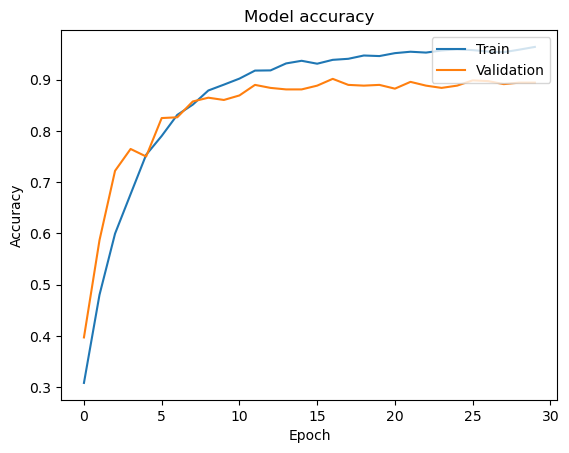

In [631]:
plt.plot(history_efficientnet.history['accuracy'])
plt.plot(history_efficientnet.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

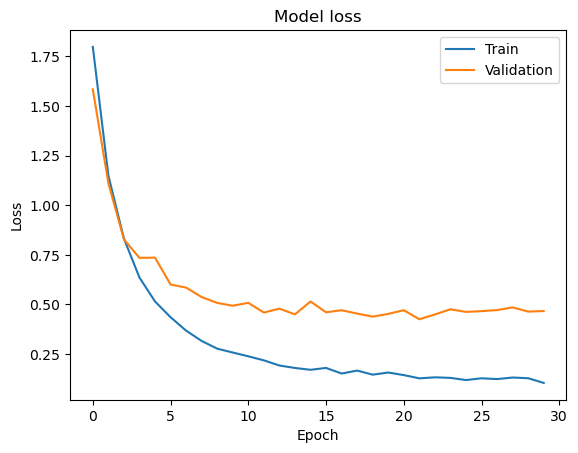

In [632]:
plt.plot(history_efficientnet.history['loss'])
plt.plot(history_efficientnet.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [830]:
val_loss, val_accuracy = final_efficient.evaluate(validation[0], validation[1], verbose=0)
print(f"validation accuracy: {val_accuracy * 100:.2f}%")
print("validation loss: ", val_loss)

validation accuracy: 89.41%
validation loss:  0.4666822552680969


In [832]:
test_loss, test_accuracy = final_efficient.evaluate(test[0], test[1], verbose=0)
print(f"Test accuracy: {test_accuracy * 100:.2f}%")
print("Test loss: ", test_loss)

Test accuracy: 90.74%
Test loss:  0.39374294877052307


In [690]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

In [692]:
y_test_bin = y_test_cat  
y_pred_probs = final_vgg19.predict(x_test)

22/22 ━━━━━━━━━━━━━━━━━━━━ 72s 3s/step


In [696]:
n_classes = y_test_bin.shape[1]
n_classes

8

In [910]:
# Compute ROC curve and ROC area for each class
fpr = {}
tpr = {}
roc_auc = {}

# for i in range(n_classes):
#     fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_probs[:, i])
#     roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and AUC
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_pred_probs.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

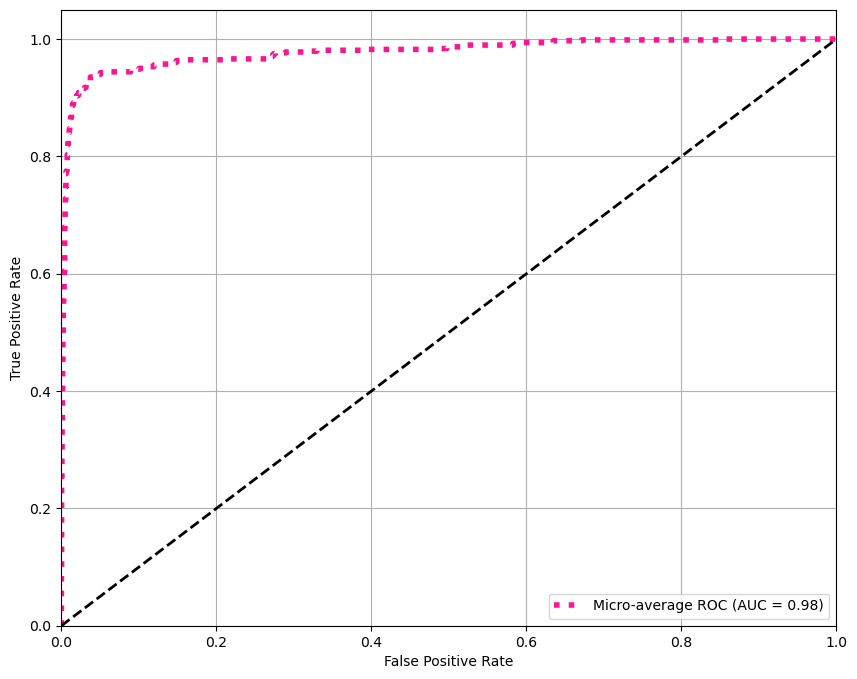

In [912]:
plt.figure(figsize=(10, 8))
colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black', 'purple', 'orange', 'brown']

# for i, color in enumerate(colors[:n_classes]):
#     plt.plot(fpr[i], tpr[i], color=color, lw=2,
#              label=f"Class {i} (AUC = {roc_auc[i]:.2f})")

plt.plot(fpr["micro"], tpr["micro"], color='deeppink', linestyle=':', linewidth=4,
         label=f'Micro-average ROC (AUC = {roc_auc["micro"]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('')
plt.legend(loc="lower right")
plt.grid()
plt.show()

In [629]:
val_loss, val_accuracy = final_efficient.evaluate(validation[0], validation[1], verbose=0)
print(f"Validation accuracy: {val_accuracy * 100:.2f}%")
print("Validation loss: ", val_loss)

Validation accuracy: 89.41%
Validation loss:  0.4666822552680969


In [630]:
test_loss, test_accuracy = final_efficient.evaluate(test[0], test[1], verbose=0)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")
print("Test loss: ", test_loss)

Test Accuracy: 90.74%
Test loss:  0.39374294877052307


In [688]:
final_efficient.save("ODIR_efficientnet.h5")

## Combine results

In [1022]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

In [987]:
y_test_bin = y_test_cat

vgg_pred_probs = final_vgg19.predict(x_test)

22/22 ━━━━━━━━━━━━━━━━━━━━ 65s 3s/step


In [988]:
resnet_pred_probs = final_resnet50.predict(x_test)

22/22 ━━━━━━━━━━━━━━━━━━━━ 23s 1s/step


In [989]:
efficientnet_pred_probs = final_efficient.predict(x_test)

22/22 ━━━━━━━━━━━━━━━━━━━━ 11s 501ms/step


In [1119]:
fpr = {}
tpr = {}
roc_auc = {}

fpr['vgg'], tpr['vgg'], _ = roc_curve(y_test_bin.ravel(), vgg_pred_probs.ravel())
roc_auc['vgg'] = auc(fpr['vgg'], tpr['vgg'])

fpr['efficientnet'], tpr['efficientnet'], _ = roc_curve(y_test_bin.ravel(), efficientnet_pred_probs.ravel())
roc_auc['efficientnet'] = auc(fpr['efficientnet'], tpr['efficientnet'])

fpr['resnet'], tpr['resnet'], _ = roc_curve(y_test_bin.ravel(), resnet_pred_probs.ravel())
roc_auc['resnet'] = auc(fpr['resnet'], tpr['resnet'])

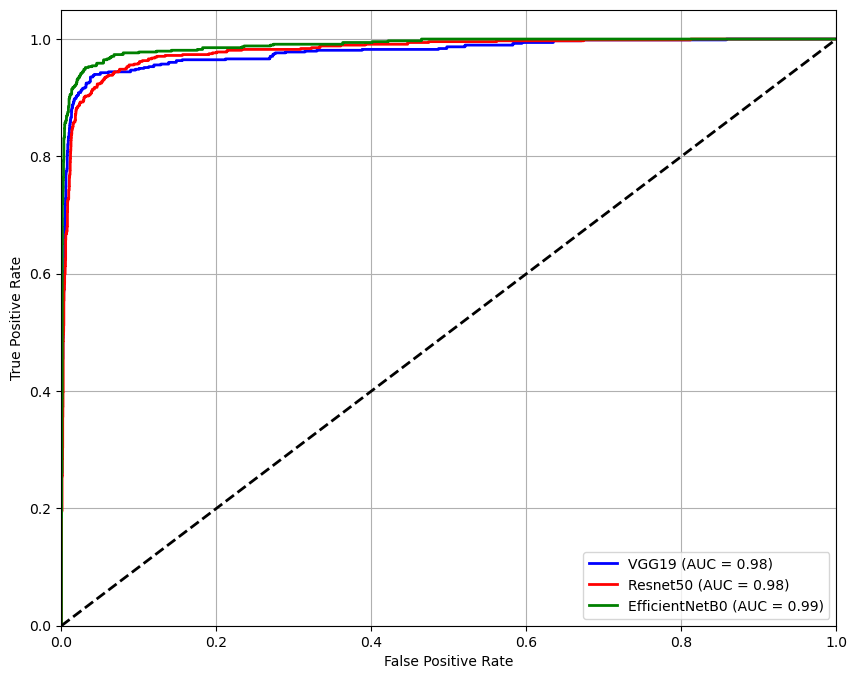

In [1123]:
plt.figure(figsize=(10, 8))
plt.plot(fpr['vgg'], tpr['vgg'], color='blue', lw=2,
         label=f'VGG19 (AUC = {roc_auc["vgg"]:.2f})')
plt.plot(fpr['resnet'], tpr['resnet'], color='red', lw=2,
         label=f'Resnet50 (AUC = {roc_auc["resnet"]:.2f})')
plt.plot(fpr['efficientnet'], tpr['efficientnet'], color='green', lw=2,
         label=f'EfficientNetB0 (AUC = {roc_auc["efficientnet"]:.2f})')
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('')
plt.legend(loc="lower right")
plt.grid()
plt.savefig('overallAUC.png') 
plt.show()

In [1252]:
original_indices = np.arange(len(dataset))

x_train, x_temp, y_train, y_temp, train_indices, temp_indices = train_test_split(
    train_x, train_y, original_indices, test_size=0.2, random_state=42)
x_val, x_test, y_val, y_test, val_indices, test_indices = train_test_split(
    x_temp, y_temp, temp_indices, test_size=0.5, random_state=42)

y_train_cat = to_categorical(y_train, num_classes=8)
y_val_cat = to_categorical(y_val, num_classes=8)
y_test_cat = to_categorical(y_test, num_classes=8)

#print("Test Indices:", test_indices)
len(test_indices)

680

In [1137]:
y_male_test_cat = to_categorical(y_male_test, num_classes=8)
y_female_test_cat = to_categorical(y_female_test, num_classes=8)

In [1139]:
male_test = (x_male_test, y_male_test_cat)
female_test = (x_female_test, y_female_test_cat)

### VGG19

In [1142]:
y_male_test_bin = y_male_test_cat
y_female_test_bin = y_female_test_cat

vgg_pred_male = final_vgg19.predict(x_male_test)
vgg_pred_female = final_vgg19.predict(x_female_test)

11/11 ━━━━━━━━━━━━━━━━━━━━ 31s 3s/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 34s 3s/step


In [1146]:
fpr['vgg_male'], tpr['vgg_male'], _ = roc_curve(y_male_test_bin.ravel(), vgg_pred_male.ravel())
roc_auc['vgg_male'] = auc(fpr['vgg_male'], tpr['vgg_male'])

fpr['vgg_female'], tpr['vgg_female'], _ = roc_curve(y_female_test_bin.ravel(), vgg_pred_female.ravel())
roc_auc['vgg_female'] = auc(fpr['vgg_female'], tpr['vgg_female'])

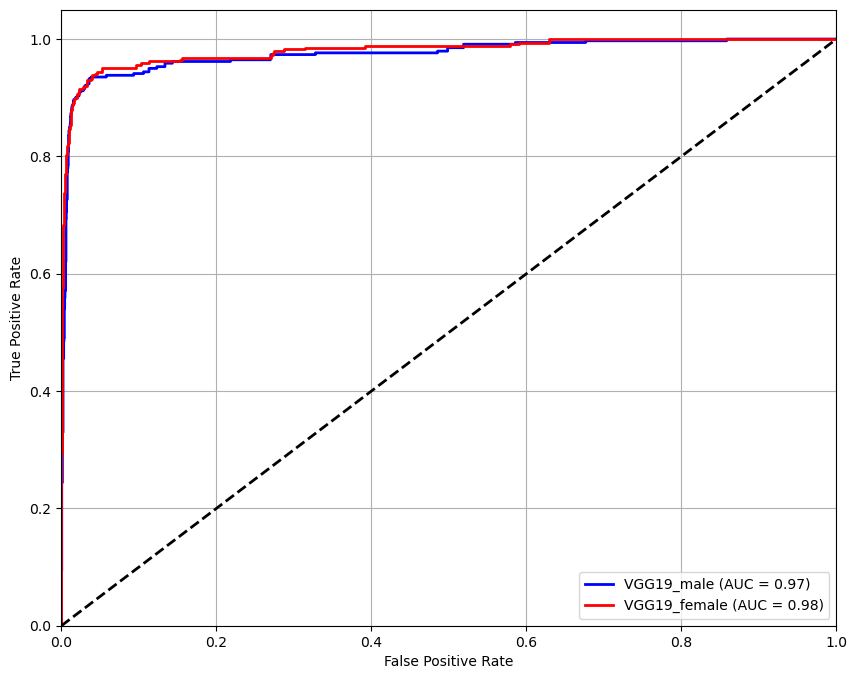

In [1150]:
plt.figure(figsize=(10, 8))
plt.plot(fpr['vgg_male'], tpr['vgg_male'], color='blue', lw=2,
         label=f'VGG19_male (AUC = {roc_auc["vgg_male"]:.2f})')
plt.plot(fpr['vgg_female'], tpr['vgg_female'], color='red', lw=2,
         label=f'VGG19_female (AUC = {roc_auc["vgg_female"]:.2f})')
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('')
plt.legend(loc="lower right")
plt.grid()
plt.savefig("VGG19_sex")
plt.show()

### Resnet

In [1153]:
resnet_pred_male = final_resnet50.predict(x_male_test)
resnet_pred_female = final_resnet50.predict(x_female_test)

11/11 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step


In [1154]:
fpr['resnet_male'], tpr['resnet_male'], _ = roc_curve(y_male_test_bin.ravel(), resnet_pred_male.ravel())
roc_auc['resnet_male'] = auc(fpr['resnet_male'], tpr['resnet_male'])

fpr['resnet_female'], tpr['resnet_female'], _ = roc_curve(y_female_test_bin.ravel(), resnet_pred_female.ravel())
roc_auc['resnet_female'] = auc(fpr['resnet_female'], tpr['resnet_female'])

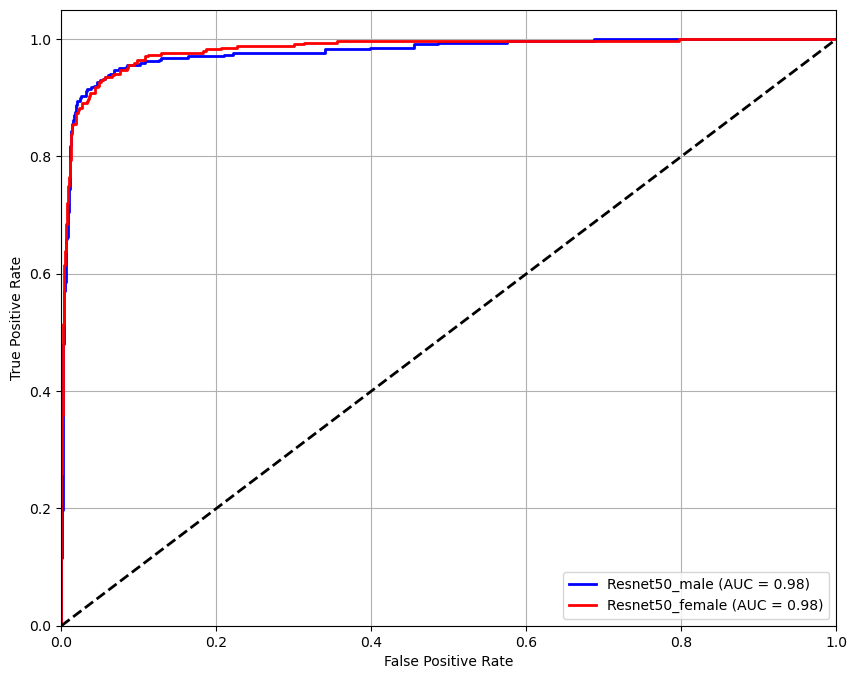

In [1155]:
plt.figure(figsize=(10, 8))
plt.plot(fpr['resnet_male'], tpr['resnet_male'], color='blue', lw=2,
         label=f'Resnet50_male (AUC = {roc_auc["resnet_male"]:.2f})')
plt.plot(fpr['resnet_female'], tpr['resnet_female'], color='red', lw=2,
         label=f'Resnet50_female (AUC = {roc_auc["resnet_female"]:.2f})')
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('')
plt.legend(loc="lower right")
plt.grid()
plt.savefig("Resnet50_sex")
plt.show()

### Efficient

In [1156]:
efficient_pred_male = final_efficient.predict(x_male_test)
efficient_pred_female = final_efficient.predict(x_female_test)

11/11 ━━━━━━━━━━━━━━━━━━━━ 5s 482ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 5s 479ms/step


In [1157]:
fpr['efficient_male'], tpr['efficient_male'], _ = roc_curve(y_male_test_bin.ravel(), efficient_pred_male.ravel())
roc_auc['efficient_male'] = auc(fpr['efficient_male'], tpr['efficient_male'])

fpr['efficient_female'], tpr['efficient_female'], _ = roc_curve(y_female_test_bin.ravel(), efficient_pred_female.ravel())
roc_auc['efficient_female'] = auc(fpr['efficient_female'], tpr['efficient_female'])

In [1158]:
auc(fpr['efficient_male'], tpr['efficient_male'])

0.9881512605042015

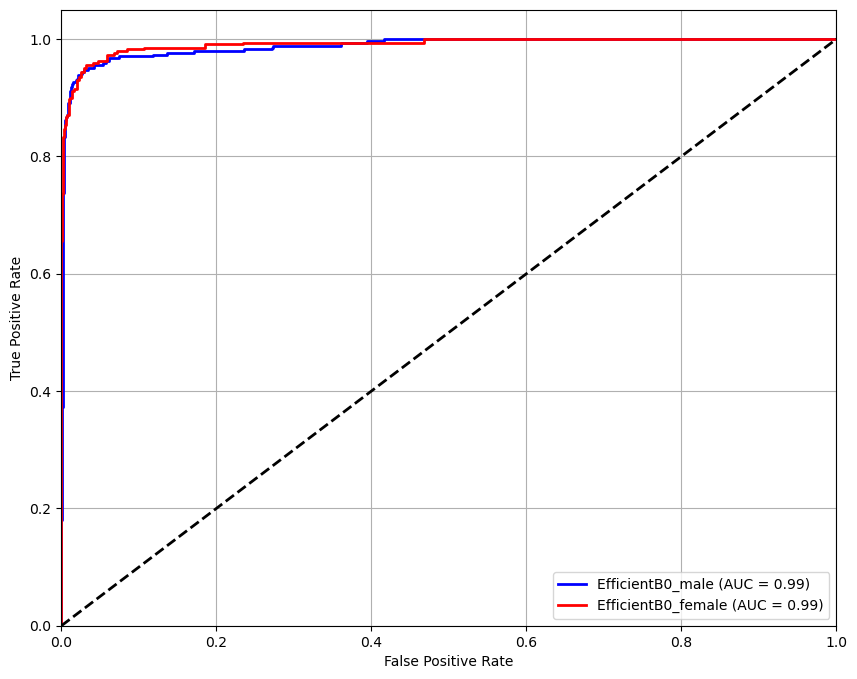

In [1159]:
plt.figure(figsize=(10, 8))
plt.plot(fpr['efficient_male'], tpr['efficient_male'], color='blue', lw=2,
         label=f'EfficientB0_male (AUC = {roc_auc["efficient_male"]:.2f})')
plt.plot(fpr['efficient_female'], tpr['efficient_female'], color='red', lw=2,
         label=f'EfficientB0_female (AUC = {roc_auc["efficient_female"]:.2f})')
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('')
plt.legend(loc="lower right")
plt.grid()
plt.savefig("EfficientB0_sex")
plt.show()

### Bar graph AUC

In [1160]:
overallVGG = auc(fpr['vgg'], tpr['vgg'])
overallRes = auc(fpr['resnet'], tpr['resnet'])
overallEff = auc(fpr['efficientnet'], tpr['efficientnet'])

overallVGG_male = auc(fpr['vgg_male'], tpr['vgg_male'])
overallRes_male = auc(fpr['resnet_male'], tpr['resnet_male'])
overallEff_male = auc(fpr['efficient_male'], tpr['efficient_male'])

overallVGG_female = auc(fpr['vgg_female'], tpr['vgg_female'])
overallRes_female = auc(fpr['resnet_female'], tpr['resnet_female'])
overallEff_female = auc(fpr['efficient_female'], tpr['efficient_female'])

In [1164]:
auc(fpr['vgg'], tpr['vgg'])

0.9778149715768659

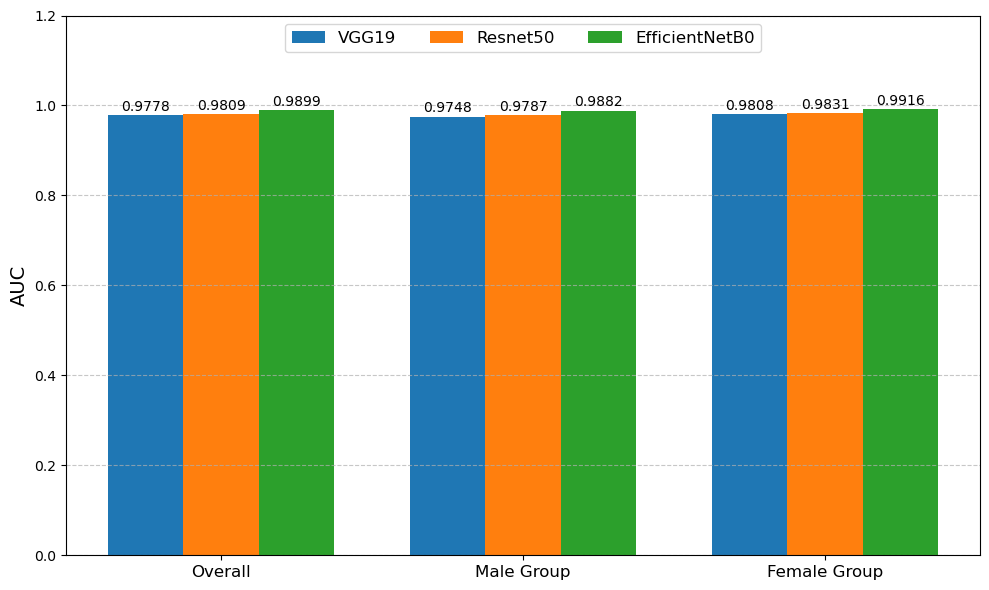

In [1193]:
import matplotlib.pyplot as plt
import numpy as np

groups = ['Overall', 'Male Group', 'Female Group']
models = ['VGG19', 'Resnet50', 'EfficientNetB0']
auc_values = [
    [overallVGG, overallRes, overallEff],  # Group 1 AUC
    [overallVGG_male, overallRes_male, overallEff_male],  # Group 2 AUC
    [overallVGG_female, overallRes_female, overallEff_female]   # Group 3 AUC
]

bar_width = 0.25  # Width of each bar
x = np.arange(len(groups))  # Group positions
offsets = [-bar_width, 0, bar_width]  # Offsets for each model in a group

# Create the plot
plt.figure(figsize=(10, 6))

# Plot each model
for i, model in enumerate(models):
    plt.bar(x + offsets[i], [auc[i] for auc in auc_values], bar_width, label=model)

# Customization
plt.title('')
plt.xlabel('', fontsize=14)
plt.ylabel('AUC', fontsize=14)
plt.xticks(x, groups, fontsize=12)
plt.ylim(0, 1.2)  # AUC range is 0 to 1
plt.legend(fontsize=12, ncol=3, loc='upper center')
plt.grid(axis='y', linestyle='--', alpha=0.7)

for i, group in enumerate(auc_values):
    for j, auc in enumerate(group):
        plt.text(x[i] + offsets[j], auc + 0.01, f"{auc:.4f}", ha='center', fontsize=10)

plt.tight_layout()
plt.savefig("bar.png")
plt.show()